# EXPLORATORY DATA ANALYSIS
## We first load our dataset:

In [62]:
import pandas as pd

df = pd.read_csv('data/Fire_Incidents_Data.csv', low_memory=False)

df

_id                                     Area_of_Origin  \
0      2475341                                   81 - Engine Area   
1      2475342                 75 - Trash, rubbish area (outside)   
2      2475343                                                NaN   
3      2475344                 75 - Trash, rubbish area (outside)   
4      2475345                                                NaN   
...        ...                                                ...   
29420  2504761                                        42 - Garage   
29421  2504762                                   81 - Engine Area   
29422  2504763  44 - Trash, Rubbish Storage (inc garbage chute...   
29423  2504764                                                NaN   
29424  2504765  44 - Trash, Rubbish Storage (inc garbage chute...   

               Building_Status                      Business_Impact  \
0                          NaN                                  NaN   
1                          NaN                                  NaN   
2                          NaN                                  NaN   
3      01 - Normal (no change)         1 - No business interruption   
4                          NaN                                  NaN   
...                        ...                                  ...   
29420  01 - Normal (no change)         1 - No business interruption   
29421                      NaN                                  NaN   
29422  01 - Normal (no change)  8 - Not applicable (not a business)   
29423                      NaN                                  NaN   
29424  01 - Normal (no change)  8 - Not applicable (not a business)   

       Civilian_Casualties  Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                      0.0                       0.0                15000.0   
1                      0.0                       0.0                   50.0   
2                      0.0                       0.0                    NaN   
3                      0.0                       0.0                    0.0   
4                      0.0                       0.0                    NaN   
...                    ...                       ...                    ...   
29420                  NaN                       0.0                    0.0   
29421                  NaN                       0.0                 5000.0   
29422                  NaN                       0.0                 2000.0   
29423                  NaN                       0.0                    NaN   
29424                  NaN                       0.0                    0.0   

       Estimated_Number_Of_Persons_Displaced  Exposures  \
0                                        NaN        NaN   
1                                        NaN        NaN   
2                                        NaN        NaN   
3                                        0.0        NaN   
4                                        NaN        NaN   
...                                      ...        ...   
29420                                    0.0        0.0   
29421                                    NaN        0.0   
29422                                    0.0        0.0   
29423                                    NaN        0.0   
29424                                    0.0        0.0   

      Ext_agent_app_or_defer_time  \
0             2018-02-24T21:12:00   
1             2018-02-24T21:29:42   
2                             NaN   
3             2018-02-25T14:19:25   
4                             NaN   
...                           ...   
29420         2022-11-26T06:20:00   
29421         2022-11-26T06:33:56   
29422         2022-11-26T08:32:05   
29423                         NaN   
29424         2022-11-26T11:26:54   

                                    Extent_Of_Fire  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3         

## Checking the data types:

In [63]:
df.dtypes

_id                                                                int64
Area_of_Origin                                                    object
Building_Status                                                   object
Business_Impact                                                   object
Civilian_Casualties                                              float64
Count_of_Persons_Rescued                                         float64
Estimated_Dollar_Loss                                            float64
Estimated_Number_Of_Persons_Displaced                            float64
Exposures                                                        float64
Ext_agent_app_or_defer_time                                       object
Extent_Of_Fire                                                    object
Final_Incident_Type                                               object
Fire_Alarm_System_Impact_on_Evacuation                            object
Fire_Alarm_System_Operation                        

## We will then drop the columns that we deemed would not be useful for our project and conducted some feature engineering:

In [64]:
import pandas as pd
pd.set_option('display.max_columns', None)

columns_to_keep = ['Area_of_Origin', 'Building_Status', 'Business_Impact', 'Extent_Of_Fire', 'Final_Incident_Type', 
                   'Fire_Alarm_System_Impact_on_Evacuation', 'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence', 
                   'Ignition_Source', 'Initial_CAD_Event_Type', 'Material_First_Ignited', 'Method_Of_Fire_Control', 
                   'Possible_Cause', 'Property_Use', 'Smoke_Alarm_at_Fire_Origin', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 
                   'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation', 
                   'Smoke_Spread', 'Sprinkler_System_Operation', 'Sprinkler_System_Presence']

df = pd.read_csv('data/Fire_Incidents_Data.csv', low_memory=False)

# feature engineering
df['Fire_Under_Control_Time'] = pd.to_datetime(df['Fire_Under_Control_Time'])
df['TFS_Alarm_Time'] = pd.to_datetime(df['TFS_Alarm_Time'])
df['TFS_Arrival_Time'] = pd.to_datetime(df['TFS_Arrival_Time'])

df['Control_Time'] = (df['Fire_Under_Control_Time'] - df['TFS_Alarm_Time']).dt.total_seconds()
df['Response_Time'] = (df['TFS_Arrival_Time'] - df['TFS_Alarm_Time']).dt.total_seconds()

# List of columns to remove
columns_to_remove = [
    'Ext_agent_app_or_defer_time', 'Fire_Under_Control_Time', 'Incident_Number', 
    'Incident_Station_Area', 'Intersection', 'Last_TFS_Unit_Clear_Time', 
    'Latitude', 'Longitude', 'TFS_Alarm_Time', 'TFS_Arrival_Time'
]

# Remove columns from the DataFrame
df.drop(columns=columns_to_remove, inplace=True)

df.columns

Index(['_id', 'Area_of_Origin', 'Building_Status', 'Business_Impact',
       'Civilian_Casualties', 'Count_of_Persons_Rescued',
       'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced',
       'Exposures', 'Extent_Of_Fire', 'Final_Incident_Type',
       'Fire_Alarm_System_Impact_on_Evacuation', 'Fire_Alarm_System_Operation',
       'Fire_Alarm_System_Presence', 'Ignition_Source', 'Incident_Ward',
       'Initial_CAD_Event_Type', 'Level_Of_Origin', 'Material_First_Ignited',
       'Method_Of_Fire_Control', 'Number_of_responding_apparatus',
       'Number_of_responding_personnel', 'Possible_Cause', 'Property_Use',
       'Smoke_Alarm_at_Fire_Origin',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type',
       'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation',
       'Smoke_Spread', 'Sprinkler_System_Operation',
       'Sprinkler_System_Presence', 'Status_of_Fire_On_Arrival',
       'TFS_Firefighter_Casualties', 'C

## The reason for feature engineering Control_Time and Response_Time:
We calculated Control_Time by substracting corresponding TFS_Alarm_Time from Fire_Under_Control_Time to determine the amount of time it took the fire services to deal with the fire incident. </br>
We calculated Response_Time by substracting corresponding TFS_Alarm_Time from TFS_Arrival_Time to determine the amount of time it took the fire services to arrive to the fire location. </br>
We created those two features because we thought that they both could be predictors in estimated dollar loss.

# Getting more information about our dataset

In [65]:
df.describe()

_id  Civilian_Casualties  Count_of_Persons_Rescued  \
count  2.942500e+04         25718.000000              29202.000000   
mean   2.490053e+06             0.065713                  0.041607   
std    8.494410e+03             0.343077                  0.905153   
min    2.475341e+06             0.000000                  0.000000   
25%    2.482697e+06             0.000000                  0.000000   
50%    2.490053e+06             0.000000                  0.000000   
75%    2.497409e+06             0.000000                  0.000000   
max    2.504765e+06            15.000000                 86.000000   

       Estimated_Dollar_Loss  Estimated_Number_Of_Persons_Displaced  \
count           2.202700e+04                           15629.000000   
mean            3.749360e+04                              16.399258   
std             4.109154e+05                             116.771102   
min             0.000000e+00                               0.000000   
25%             5.000000e+02                               0.000000   
50%             3.000000e+03                               0.000000   
75%             1.700000e+04                               1.000000   
max             5.000000e+07                             999.000000   

         Exposures  Incident_Ward  Number_of_responding_apparatus  \
count  4007.000000   29288.000000                    29203.000000   
mean      0.186174      15.816546                        6.324727   
std       0.597280      10.610345                        7.455182   
min       0.000000       0.000000                        0.000000   
25%       0.000000       7.000000                        1.000000   
50%       0.000000      13.000000                        6.000000   
75%       0.000000      22.000000                        7.000000   
max       7.000000      44.000000                      436.000000   

       Number_of_responding_personnel  TFS_Firefighter_Casualties  \
count                    29203.000000                29203.000000   
mean                        21.218334                    0.010855   
std                         23.307372                    0.125448   
min                          0.000000                    0.000000   
25%                          4.000000                    0.000000   
50%                         20.000000                    0.000000   
75%                         25.000000                    0.000000   
max                       1275.000000                    4.000000   

        Control_Time  Response_Time  
count   22050.000000   29424.000000  
mean     1133.401497     325.043400  
std      2564.202960     283.673531  
min        19.000000       1.000000  
25%       464.000000     254.000000  
50%       688.000000     308.000000  
75%      1117.000000     373.000000  
max    120872.000000   40942.000000

### Some insights into our data:
**Civilian_Casualties:** </br>
We can see that the mean of civilian casualties is at 0.065713 which tells us that for most fire incidents, people do not tend to be subject to death. </br>
We can also identify that the maximum of civilian casualties that occured in a single fire is 15 persons. </br>
**Count_of_Persons_Rescued:** </br>
We can also see that the mean of persons rescued is at 0.041607 which also tells us that for most fire incidents, people do not tend to need to be rescued. </br>
We can also identify that the maximum of persons that have been rescued from a single fire is 86. </br>
**Estimated_Dollar_Loss:** </br>
Maximum Dollar Loss: 50000000 </br>

In [66]:
df.isnull().sum()

_id                                                                  0
Area_of_Origin                                                    7422
Building_Status                                                  13795
Business_Impact                                                  13797
Civilian_Casualties                                               3707
Count_of_Persons_Rescued                                           223
Estimated_Dollar_Loss                                             7398
Estimated_Number_Of_Persons_Displaced                            13796
Exposures                                                        25418
Extent_Of_Fire                                                   13797
Final_Incident_Type                                                  0
Fire_Alarm_System_Impact_on_Evacuation                           13797
Fire_Alarm_System_Operation                                      13797
Fire_Alarm_System_Presence                                       13797
Igniti

# We will then remove rows that are null from the column Area_of_Origin
## This is done because if Area_of_Origin is null then that means there would have not been any fire. In other words, no fire means no origin.

In [67]:
# Removing rows with no values at all according to column name: Area_of_Origin
df_cleaned = df.dropna(subset=['Area_of_Origin', 'Initial_CAD_Event_Type'])

df_cleaned

_id                                     Area_of_Origin  \
0      2475341                                   81 - Engine Area   
1      2475342                 75 - Trash, rubbish area (outside)   
3      2475344                 75 - Trash, rubbish area (outside)   
5      2475346                                   81 - Engine Area   
6      2475347  22 - Sleeping Area or Bedroom (inc. patients r...   
...        ...                                                ...   
29419  2504760                                   81 - Engine Area   
29420  2504761                                        42 - Garage   
29421  2504762                                   81 - Engine Area   
29422  2504763  44 - Trash, Rubbish Storage (inc garbage chute...   
29424  2504765  44 - Trash, Rubbish Storage (inc garbage chute...   

               Building_Status                      Business_Impact  \
0                          NaN                                  NaN   
1                          NaN                                  NaN   
3      01 - Normal (no change)         1 - No business interruption   
5                          NaN                                  NaN   
6      01 - Normal (no change)         1 - No business interruption   
...                        ...                                  ...   
29419                      NaN                                  NaN   
29420  01 - Normal (no change)         1 - No business interruption   
29421                      NaN                                  NaN   
29422  01 - Normal (no change)  8 - Not applicable (not a business)   
29424  01 - Normal (no change)  8 - Not applicable (not a business)   

       Civilian_Casualties  Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                      0.0                       0.0                15000.0   
1                      0.0                       0.0                   50.0   
3                      0.0                       0.0                    0.0   
5                      0.0                       0.0                 1500.0   
6                      0.0                       0.0                 2000.0   
...                    ...                       ...                    ...   
29419                  NaN                       0.0                50000.0   
29420                  NaN                       0.0                    0.0   
29421                  NaN                       0.0                 5000.0   
29422                  NaN                       0.0                 2000.0   
29424                  NaN                       0.0                    0.0   

       Estimated_Number_Of_Persons_Displaced  Exposures  \
0                                        NaN        NaN   
1                                        NaN        NaN   
3                                        0.0        NaN   
5                                        NaN        NaN   
6                                        0.0        NaN   
...                                      ...        ...   
29419                                    NaN        0.0   
29420                                    0.0        0.0   
29421                                    NaN        0.0   
29422                                    0.0        0.0   
29424                                    0.0        0.0   

                                    Extent_Of_Fire Final_Incident_Type  \
0                                              NaN           01 - Fire   
1                                              NaN           01 - Fire   
3                 1 - Confined to object of origin           01 - Fire   
5                                              NaN           01 - Fire   
6      2 - Confined to part of room/area of origin           01 - Fire   
...                                            ...                 ...   
29419                                          NaN           01 - Fire   
29420             1 - Confined to object of origin           01 - Fire   
29421

# We do the same for Final_Incident_Type but with a different condition
## This time, if rows contain '03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vandal,child playing,recycling or dump fires)', then they are removed as these entries have other columns that are empty and can greatly affect our data analysis

In [68]:
df_cleaned2 = df_cleaned[df_cleaned['Final_Incident_Type'] != "03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vandal,child playing,recycling or dump fires)"].copy()

df_cleaned2

_id                                     Area_of_Origin  \
0      2475341                                   81 - Engine Area   
1      2475342                 75 - Trash, rubbish area (outside)   
3      2475344                 75 - Trash, rubbish area (outside)   
5      2475346                                   81 - Engine Area   
6      2475347  22 - Sleeping Area or Bedroom (inc. patients r...   
...        ...                                                ...   
29419  2504760                                   81 - Engine Area   
29420  2504761                                        42 - Garage   
29421  2504762                                   81 - Engine Area   
29422  2504763  44 - Trash, Rubbish Storage (inc garbage chute...   
29424  2504765  44 - Trash, Rubbish Storage (inc garbage chute...   

               Building_Status                      Business_Impact  \
0                          NaN                                  NaN   
1                          NaN                                  NaN   
3      01 - Normal (no change)         1 - No business interruption   
5                          NaN                                  NaN   
6      01 - Normal (no change)         1 - No business interruption   
...                        ...                                  ...   
29419                      NaN                                  NaN   
29420  01 - Normal (no change)         1 - No business interruption   
29421                      NaN                                  NaN   
29422  01 - Normal (no change)  8 - Not applicable (not a business)   
29424  01 - Normal (no change)  8 - Not applicable (not a business)   

       Civilian_Casualties  Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                      0.0                       0.0                15000.0   
1                      0.0                       0.0                   50.0   
3                      0.0                       0.0                    0.0   
5                      0.0                       0.0                 1500.0   
6                      0.0                       0.0                 2000.0   
...                    ...                       ...                    ...   
29419                  NaN                       0.0                50000.0   
29420                  NaN                       0.0                    0.0   
29421                  NaN                       0.0                 5000.0   
29422                  NaN                       0.0                 2000.0   
29424                  NaN                       0.0                    0.0   

       Estimated_Number_Of_Persons_Displaced  Exposures  \
0                                        NaN        NaN   
1                                        NaN        NaN   
3                                        0.0        NaN   
5                                        NaN        NaN   
6                                        0.0        NaN   
...                                      ...        ...   
29419                                    NaN        0.0   
29420                                    0.0        0.0   
29421                                    NaN        0.0   
29422                                    0.0        0.0   
29424                                    0.0        0.0   

                                    Extent_Of_Fire Final_Incident_Type  \
0                                              NaN           01 - Fire   
1                                              NaN           01 - Fire   
3                 1 - Confined to object of origin           01 - Fire   
5                                              NaN           01 - Fire   
6      2 - Confined to part of room/area of origin           01 - Fire   
...                                            ...                 ...   
29419                                          NaN           01 - Fire   
29420             1 - Confined to object of origin           01 - Fire   
29421

## This leaves us with 21988 rows indicating that rows containing '03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vandal,child playing,recycling or dump fires)' have been removed.

In [69]:
df_cleaned2.isnull().sum()

_id                                                                  0
Area_of_Origin                                                       0
Building_Status                                                   6369
Business_Impact                                                   6371
Civilian_Casualties                                               1857
Count_of_Persons_Rescued                                             1
Estimated_Dollar_Loss                                                2
Estimated_Number_Of_Persons_Displaced                             6370
Exposures                                                        19619
Extent_Of_Fire                                                    6371
Final_Incident_Type                                                  0
Fire_Alarm_System_Impact_on_Evacuation                            6371
Fire_Alarm_System_Operation                                       6371
Fire_Alarm_System_Presence                                        6371
Igniti

## Area_of_Origin shows zero which means there are no more null values.
However, other columns have a lot of missing values which can affect our analysis, therefore, we decided to proceed with imputing them using SimpleImputer

In [70]:
categorical_columns= ['Area_of_Origin','Building_Status','Business_Impact','Extent_Of_Fire','Final_Incident_Type',
 'Fire_Alarm_System_Impact_on_Evacuation','Fire_Alarm_System_Operation','Fire_Alarm_System_Presence',
 'Ignition_Source','Material_First_Ignited','Method_Of_Fire_Control','Possible_Cause',
 'Property_Use','Smoke_Alarm_at_Fire_Origin','Smoke_Alarm_at_Fire_Origin_Alarm_Failure','Smoke_Alarm_at_Fire_Origin_Alarm_Type',
 'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation','Smoke_Spread','Sprinkler_System_Operation','Sprinkler_System_Presence',
 'Status_of_Fire_On_Arrival', 'Incident_Ward', 'Level_Of_Origin']

### Converting categorical columns to string to ensure data integrity, ease the imputation process, and making the dataset ready for subsequent analysis

In [71]:
for col in categorical_columns:

    df_cleaned2[col] = df_cleaned2[col].astype('string')


In [72]:
## Checking if the conversion was successful
df_cleaned2.dtypes

_id                                                                       int64
Area_of_Origin                                                   string[python]
Building_Status                                                  string[python]
Business_Impact                                                  string[python]
Civilian_Casualties                                                     float64
Count_of_Persons_Rescued                                                float64
Estimated_Dollar_Loss                                                   float64
Estimated_Number_Of_Persons_Displaced                                   float64
Exposures                                                               float64
Extent_Of_Fire                                                   string[python]
Final_Incident_Type                                              string[python]
Fire_Alarm_System_Impact_on_Evacuation                           string[python]
Fire_Alarm_System_Operation             

## Conducting the imputation by using most_frequent as these are categorical data

In [73]:
from sklearn.impute import SimpleImputer

# Specifying pd.NA as the missing value indicator for SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=pd.NA)

# Applying the imputer to the categorical columns
df_cleaned2[categorical_columns] = imputer.fit_transform(df_cleaned2[categorical_columns])


In [74]:
df_cleaned2

_id                                     Area_of_Origin  \
0      2475341                                   81 - Engine Area   
1      2475342                 75 - Trash, rubbish area (outside)   
3      2475344                 75 - Trash, rubbish area (outside)   
5      2475346                                   81 - Engine Area   
6      2475347  22 - Sleeping Area or Bedroom (inc. patients r...   
...        ...                                                ...   
29419  2504760                                   81 - Engine Area   
29420  2504761                                        42 - Garage   
29421  2504762                                   81 - Engine Area   
29422  2504763  44 - Trash, Rubbish Storage (inc garbage chute...   
29424  2504765  44 - Trash, Rubbish Storage (inc garbage chute...   

               Building_Status                      Business_Impact  \
0      01 - Normal (no change)  8 - Not applicable (not a business)   
1      01 - Normal (no change)  8 - Not applicable (not a business)   
3      01 - Normal (no change)         1 - No business interruption   
5      01 - Normal (no change)  8 - Not applicable (not a business)   
6      01 - Normal (no change)         1 - No business interruption   
...                        ...                                  ...   
29419  01 - Normal (no change)  8 - Not applicable (not a business)   
29420  01 - Normal (no change)         1 - No business interruption   
29421  01 - Normal (no change)  8 - Not applicable (not a business)   
29422  01 - Normal (no change)  8 - Not applicable (not a business)   
29424  01 - Normal (no change)  8 - Not applicable (not a business)   

       Civilian_Casualties  Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                      0.0                       0.0                15000.0   
1                      0.0                       0.0                   50.0   
3                      0.0                       0.0                    0.0   
5                      0.0                       0.0                 1500.0   
6                      0.0                       0.0                 2000.0   
...                    ...                       ...                    ...   
29419                  NaN                       0.0                50000.0   
29420                  NaN                       0.0                    0.0   
29421                  NaN                       0.0                 5000.0   
29422                  NaN                       0.0                 2000.0   
29424                  NaN                       0.0                    0.0   

       Estimated_Number_Of_Persons_Displaced  Exposures  \
0                                        NaN        NaN   
1                                        NaN        NaN   
3                                        0.0        NaN   
5                                        NaN        NaN   
6                                        0.0        NaN   
...                                      ...        ...   
29419                                    NaN        0.0   
29420                                    0.0        0.0   
29421                                    NaN        0.0   
29422                                    0.0        0.0   
29424                                    0.0        0.0   

                                    Extent_Of_Fire Final_Incident_Type  \
0                 1 - Confined to object of origin           01 - Fire   
1                 1 - Confined to object of origin           01 - Fire   
3                 1 - Confined to object of origin           01 - Fire   
5                 1 - Confined to object of origin           01 - Fire   
6      2 - Confined to part of room/area of origin           01 - Fire   
...                                            ...                 ...   
29419             1 - Confined to object of origin           01 - Fire   
29420             1 - Confined to object of origin           01 - Fire   
29421

## Checking if imputation was successful for all categorical data

In [75]:
df_cleaned2.isnull().sum()

_id                                                                  0
Area_of_Origin                                                       0
Building_Status                                                      0
Business_Impact                                                      0
Civilian_Casualties                                               1857
Count_of_Persons_Rescued                                             1
Estimated_Dollar_Loss                                                2
Estimated_Number_Of_Persons_Displaced                             6370
Exposures                                                        19619
Extent_Of_Fire                                                       0
Final_Incident_Type                                                  0
Fire_Alarm_System_Impact_on_Evacuation                               0
Fire_Alarm_System_Operation                                          0
Fire_Alarm_System_Presence                                           0
Igniti

### Every categorical column seems to be zero which means that it was a success, we now proceed with the remaining null numerical columns

In [76]:
# Median imputation for numerical columns
median_impute_cols = ['Civilian_Casualties', 'Count_of_Persons_Rescued', 
                      'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced', 'Exposures',
                      'Control_Time', 'Response_Time'
                     ]

numerical_imputer = SimpleImputer(strategy="median")

# Applying median imputation
for col in median_impute_cols:
    df_cleaned2[col] = numerical_imputer.fit_transform(df_cleaned2[[col]])


# Verify if imputation is successful by checking missing values again
df_cleaned2.isnull().sum()

_id                                                              0
Area_of_Origin                                                   0
Building_Status                                                  0
Business_Impact                                                  0
Civilian_Casualties                                              0
Count_of_Persons_Rescued                                         0
Estimated_Dollar_Loss                                            0
Estimated_Number_Of_Persons_Displaced                            0
Exposures                                                        0
Extent_Of_Fire                                                   0
Final_Incident_Type                                              0
Fire_Alarm_System_Impact_on_Evacuation                           0
Fire_Alarm_System_Operation                                      0
Fire_Alarm_System_Presence                                       0
Ignition_Source                                               

### Every column seems to be clear of null values, indicating imputation success. We can now save the dataset in a new excel file.

In [77]:
df_cleaned2.to_csv('testimputed_Fire_Incidents_Data.csv', index=False)

### We can now do some visualizations on the resulting dataset to find out more.

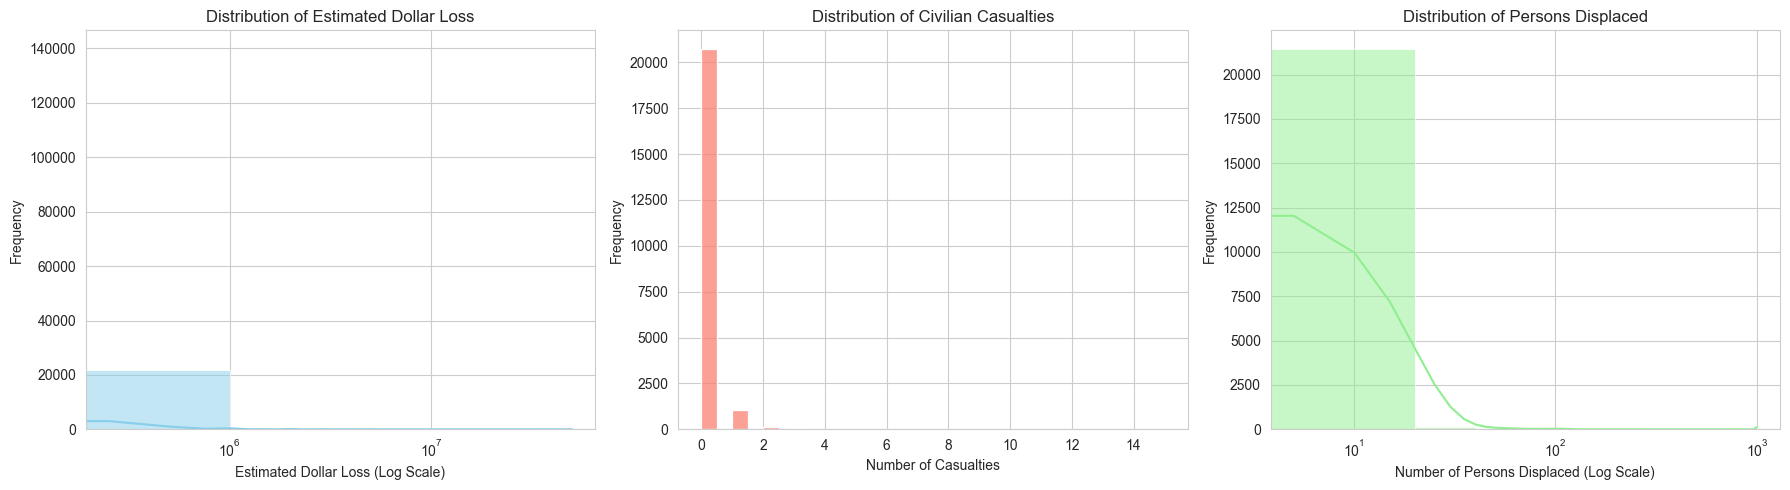

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Distribution of Estimated Dollar Loss, Civilian Casualties, and Persons Displaced
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Estimated Dollar Loss
sns.histplot(df_cleaned2['Estimated_Dollar_Loss'], ax=ax[0], bins=50, kde=True, color='skyblue')
ax[0].set_title('Distribution of Estimated Dollar Loss')
ax[0].set_xscale('log')  # Log scale due to wide range of values
ax[0].set_xlabel('Estimated Dollar Loss (Log Scale)')
ax[0].set_ylabel('Frequency')

# Civilian Casualties
sns.histplot(df_cleaned2['Civilian_Casualties'], ax=ax[1], bins=30, kde=False, color='salmon')
ax[1].set_title('Distribution of Civilian Casualties')
ax[1].set_xlabel('Number of Casualties')
ax[1].set_ylabel('Frequency')

# Persons Displaced
sns.histplot(df_cleaned2['Estimated_Number_Of_Persons_Displaced'], ax=ax[2], bins=50, kde=True, color='lightgreen')
ax[2].set_title('Distribution of Persons Displaced')
ax[2].set_xscale('log')  # Log scale due to wide range of values
ax[2].set_xlabel('Number of Persons Displaced (Log Scale)')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## This tells us that:
- Estimated Dollar Loss needs to be readjusted as zero values were not properly dealt with when applying the log scale.
- Number of casualties are in a lot of cases zero, this can be seen from the size of the bar compared to other values.
- Most incidents displace a smaller number of persons, with the frequency decreasing as the number of displaced persons increases.

  ### We will readjust Estimated_Dollar_Loss with a Log Transformation.

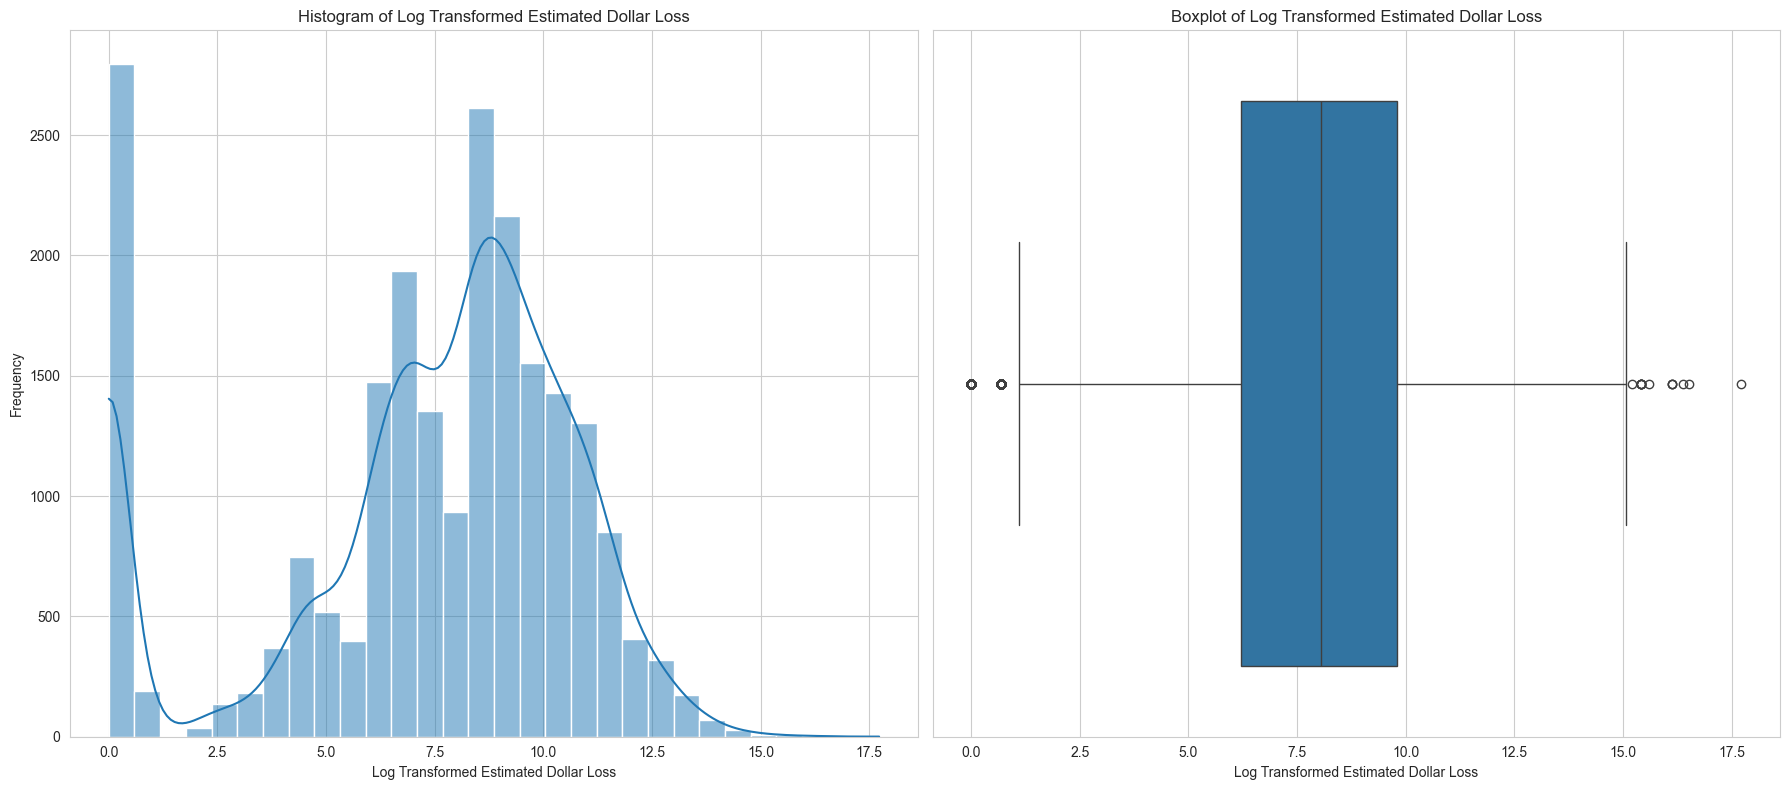

In [79]:
import numpy as np

# Shift the data by adding a small constant
df_cleaned2['Estimated_Dollar_Loss_Shifted'] = df_cleaned2['Estimated_Dollar_Loss'] + 1

# Apply the log transformation
df_cleaned2['Estimated_Dollar_Loss_Log'] = np.log(df_cleaned2['Estimated_Dollar_Loss_Shifted'])

# Visualizing the transformed data
plt.figure(figsize=(18, 8))

# Histogram of the log-transformed data
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned2['Estimated_Dollar_Loss_Log'], kde=True, bins=30)
plt.title('Histogram of Log Transformed Estimated Dollar Loss')
plt.xlabel('Log Transformed Estimated Dollar Loss')
plt.ylabel('Frequency')

# Boxplot of the log-transformed data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned2['Estimated_Dollar_Loss_Log'])
plt.title('Boxplot of Log Transformed Estimated Dollar Loss')
plt.xlabel('Log Transformed Estimated Dollar Loss')

plt.tight_layout()
plt.show()


### Observations after carrying out Log Transformation on Estimated_Dollar_Loss
- It appears to be normally distributed or close to normal after the revised log transformation, which suggests that the transformation was successful in reducing the variance and normalizing the data.
- The shape is symmetric at the peak, which is considered as a characteristic of normally distributed data.

### Having normalized data for Estimated_Dollar_Loss allowed us to have a better visualization on the histogram and will also allow us to better plot box plots.

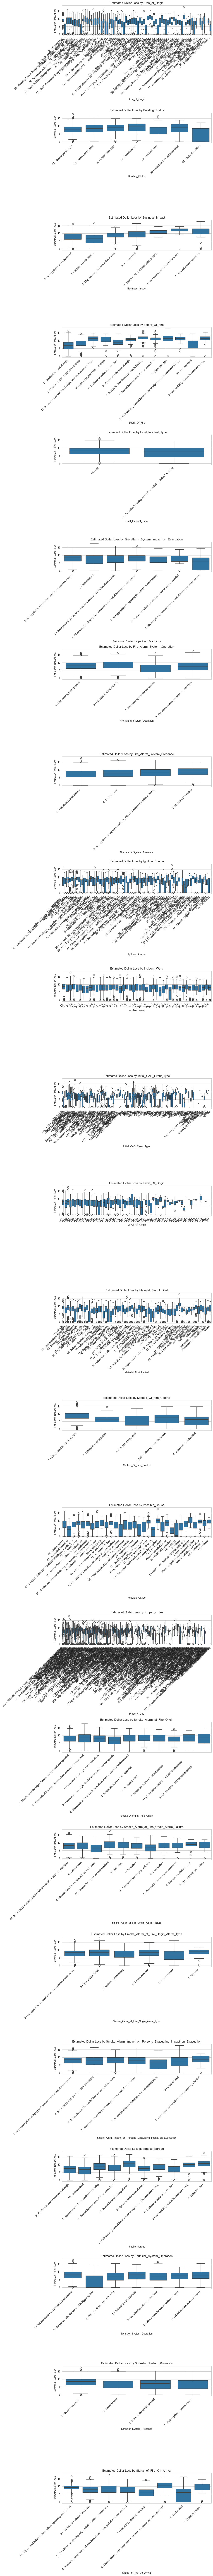

In [80]:
import seaborn as sns

categorical_cols = df_cleaned2.select_dtypes(include=['object']).columns

n_plots = len(categorical_cols)
fig_height = n_plots * 6  
plt.figure(figsize=(12, fig_height))

for index, col in enumerate(categorical_cols, start=1):
    plt.subplot(n_plots, 1, index)
    sns.boxplot(x=col, y=df_cleaned2['Estimated_Dollar_Loss_Log'], data=df_cleaned2)
    plt.title(f'Estimated Dollar Loss by {col}')
    plt.xticks(rotation=45, ha="right")
    plt.ylabel('Estimated Dollar Loss')
    plt.xlabel(col)
    plt.tight_layout()

plt.show()


## Calculating Correlation Matrix for ALL numeric features

In [93]:
import pandas as pd
import numpy as np

# Select all numeric columns in the DataFrame
numeric_columns = df_cleaned2.select_dtypes(include=[np.number]).columns

# Compute the correlation matrix for all numeric columns
correlation_matrix_all_numeric = df_cleaned2[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix_all_numeric)


                                            _id  Civilian_Casualties  \
_id                                    1.000000             0.001766   
Civilian_Casualties                    0.001766             1.000000   
Count_of_Persons_Rescued               0.007230             0.111071   
Estimated_Dollar_Loss                  0.012042             0.020240   
Estimated_Number_Of_Persons_Displaced  0.011806             0.043025   
Exposures                              0.022012             0.011925   
Number_of_responding_apparatus         0.116797             0.149568   
Number_of_responding_personnel         0.126239             0.142822   
TFS_Firefighter_Casualties             0.012800             0.062714   
Control_Time                           0.028250             0.027006   
Response_Time                          0.000239            -0.012794   
Estimated_Dollar_Loss_Shifted          0.012042             0.020240   
Estimated_Dollar_Loss_Log              0.062994             0.10

### Plotting a heatmap of the correlation matrix to better visualize it

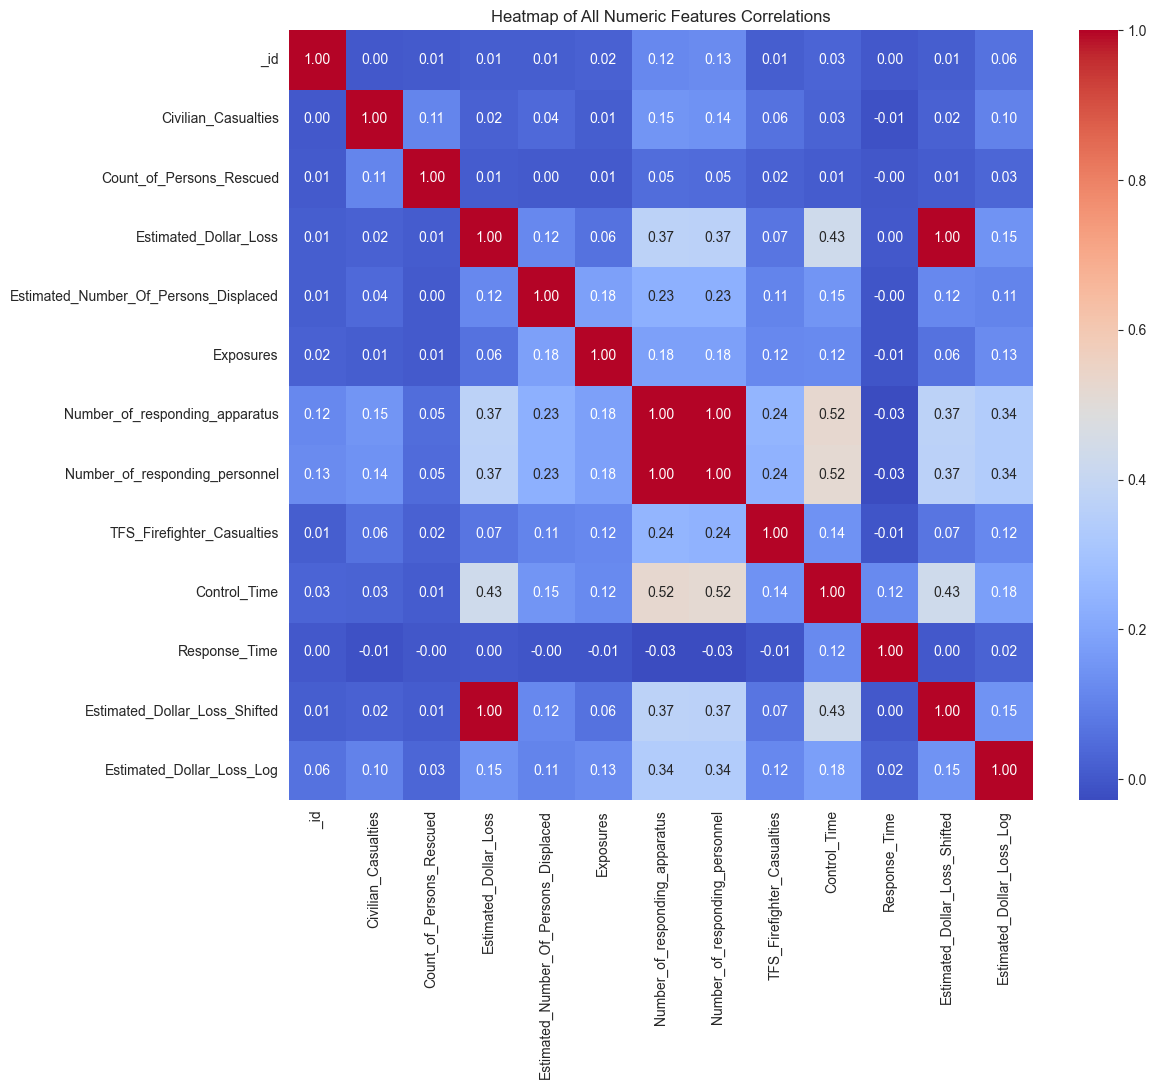

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_numeric_2, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of All Numeric Features Correlations')
plt.show()

### Determining correlation between numerical columns with Estimated_Dollar_Loss only by using a correlation matrix

In [89]:
correlation_matrix_numeric = df_cleaned2.select_dtypes(include=[np.number]).corr()

correlation_with_estimated_dollar_loss = correlation_matrix_numeric['Estimated_Dollar_Loss'].sort_values(ascending=False)

correlation_with_estimated_dollar_loss

Estimated_Dollar_Loss                    1.000000
Estimated_Dollar_Loss_Shifted            1.000000
Control_Time                             0.430149
Number_of_responding_apparatus           0.369946
Number_of_responding_personnel           0.368516
Estimated_Dollar_Loss_Log                0.145978
Estimated_Number_Of_Persons_Displaced    0.118358
TFS_Firefighter_Casualties               0.070167
Exposures                                0.061270
Civilian_Casualties                      0.020240
_id                                      0.012042
Count_of_Persons_Rescued                 0.009096
Response_Time                            0.001422
Name: Estimated_Dollar_Loss, dtype: float64

### Determining correlation between numerical columns with Estimated_Dollar_Loss_Log only by using a correlation matrix

In [95]:
correlation_with_loss_log = correlation_matrix_numeric['Estimated_Dollar_Loss_Log'].sort_values(ascending=False)

correlation_with_loss_log

Estimated_Dollar_Loss_Log                1.000000
Number_of_responding_apparatus           0.340418
Number_of_responding_personnel           0.338265
Control_Time                             0.176407
Estimated_Dollar_Loss                    0.145978
Estimated_Dollar_Loss_Shifted            0.145978
Exposures                                0.127432
TFS_Firefighter_Casualties               0.117588
Estimated_Number_Of_Persons_Displaced    0.107002
Civilian_Casualties                      0.100618
_id                                      0.062994
Count_of_Persons_Rescued                 0.034658
Response_Time                            0.023824
Name: Estimated_Dollar_Loss_Log, dtype: float64

## The log transformed estimated dollar loss gives us different results than the non-transformed one so we will proceed with the log transformed.

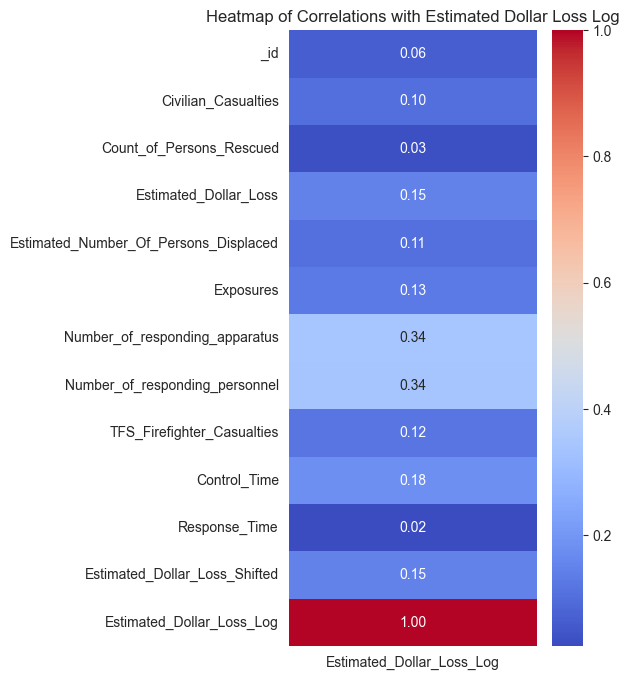

In [96]:
correlation_with_estimated_loss_log = correlation_matrix_numeric[['Estimated_Dollar_Loss_Log']]

plt.figure(figsize=(4, 8))
sns.heatmap(correlation_with_estimated_loss_log, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations with Estimated Dollar Loss Log')
plt.show()


## For better visualization, we use a bar chart:

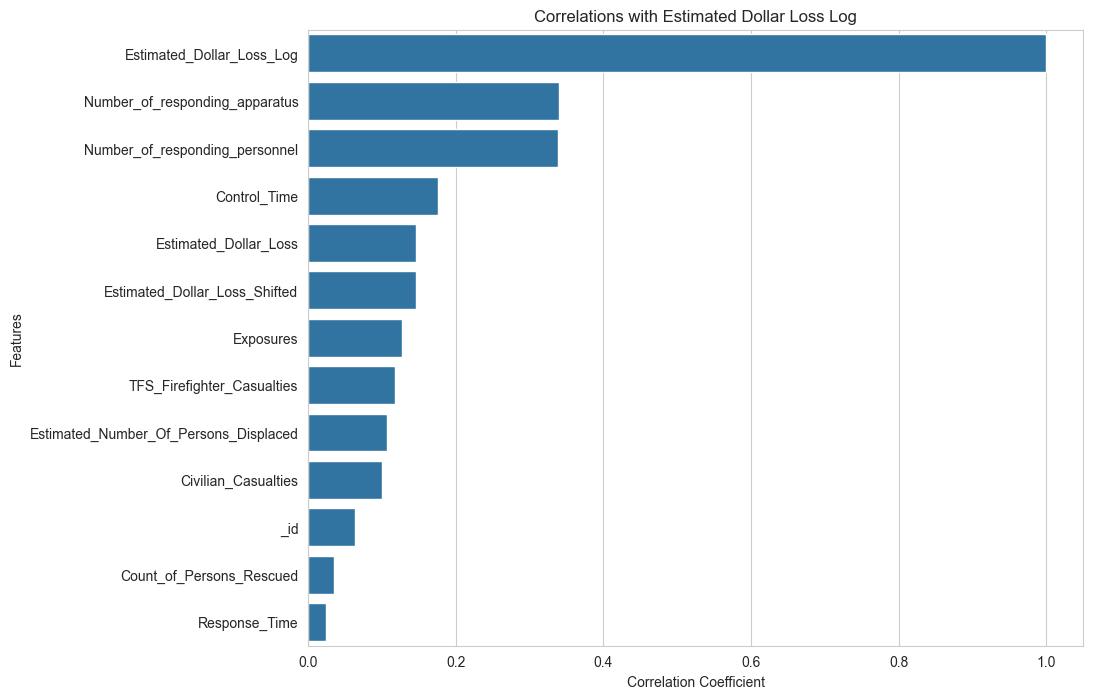

In [99]:
correlation_with_loss_log_only = correlation_matrix_numeric['Estimated_Dollar_Loss_Log'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_loss_log_only.values, y=correlation_with_loss_log_only.index)
plt.title('Correlations with Estimated Dollar Loss Log')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


# We are done visualizing numerical data, let's interprete them:
Correlation Coefficient (r): This is a measure that ranges from -1 to 1, indicating the strength and direction of a linear relationship between two variables. 1 or -1: A perfect linear relationship. A correlation of 1 means that an increase in one variable perfectly predicts an increase in the other, while -1 means an increase in one perfectly predicts a decrease in the other. 0: No linear relationship between the variables. Values between 0 and ±1: Indicate the degree of linear correlation between the variables, with values closer to ±1 indicating stronger relationships. Interpretation of Your Specific Correlations: Log_Estimated_Dollar_Loss with Itself: It's always going to be 1 because any variable is perfectly correlated with itself. </br>

1. **Number_of_responding_apparatus (0.340418) and Number_of_responding_personnel (0.338265)**: </br> These features have moderate positive correlations with 'Estimated_Dollar_Loss_Log'. This suggests that as the number of responding apparatus and personnel increases, the log of estimated dollar loss tends to increase as well. This might indicate that more significant incidents, which result in higher losses, require more resources.

2. **Control_Time (0.176407)**: </br> This feature has a weaker positive correlation with 'Estimated_Dollar_Loss_Log'. A higher control time, which indicates the duration to bring the fire under control, is slightly associated with higher losses, possibly indicating that longer durations to control a fire can lead to more damage.

3. **Exposures (0.127432)**: </br> A slight positive correlation with 'Estimated_Dollar_Loss_Log' suggests that as exposures increase, there is a minor increase in the log of estimated dollar loss, indicating potential minor impacts from neighboring properties or units being involved in the incident.

4. **TFS_Firefighter_Casualties (0.117588)**: </br> This indicates a slight positive correlation with 'Estimated_Dollar_Loss_Log'. More firefighter casualties might occur in more severe incidents, which could result in higher dollar losses.

5. **Estimated_Number_Of_Persons_Displaced (0.107002)**: </br> Shows a slight positive correlation, indicating that incidents that result in more people being displaced tend to have slightly higher dollar losses.

6. **Civilian_Casualties (0.100618)**: </br> A weak positive correlation suggests that incidents with civilian casualties tend to have slightly higher dollar losses, possibly reflecting the severity of the incident.

7. **Count_of_Persons_Rescued (0.034658)** and **Response_Time (0.023824)**: </br> These features show very weak positive correlations with 'Estimated_Dollar_Loss_Log'. This indicates that there is almost no linear relationship between these variables and the log of estimated dollar loss.


##  And we can conclude that:
Number_of_responding_apparatus and Number_of_responding_personnel are two promising predictors for now. Because of their correlation coefficient, we might need to take other numerical features to aid in prediction. </br>
## However, we also need to see the impact of categorical columns as well, which we will delve into now.

# Plotting pie charts to visualize distribution of categorical columns better (Top 3 for each column and the rest are grouped in 'Other')

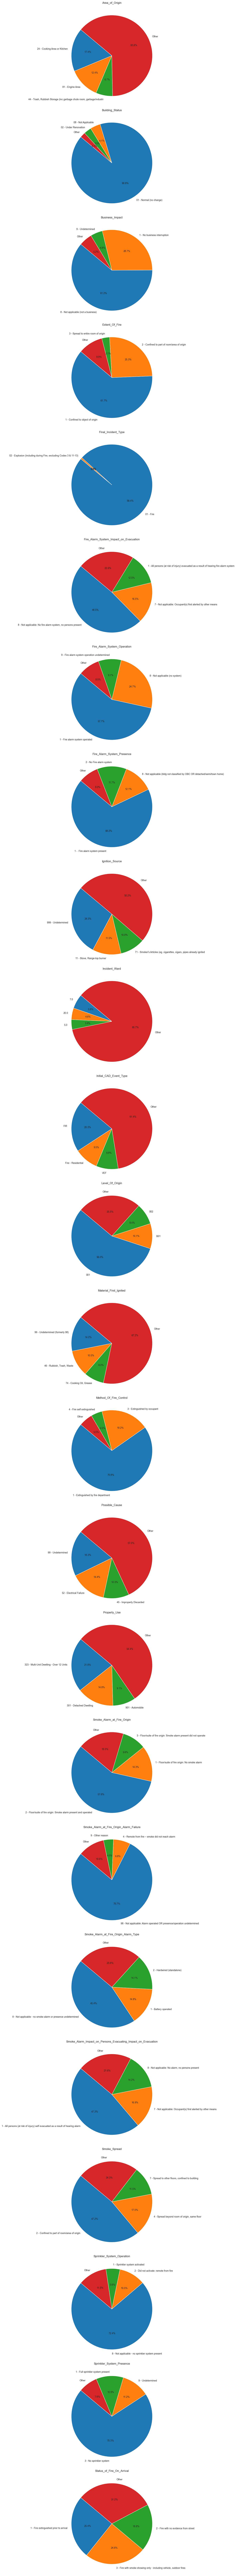

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(150, 150))

for index, col in enumerate(categorical_cols, start=1):
    # Selecting the top 5 categories by frequency
    top_categories = df_cleaned2[col].value_counts().nlargest(3)
    # Calculating "Other" category sum
    other_sum = df_cleaned2[col].value_counts().sum() - top_categories.sum()
    other_series = pd.Series([other_sum], index=['Other'])
    top_categories_with_other = pd.concat([top_categories, other_series])
    
    plt.subplot(len(categorical_cols), 1, index)
    top_categories_with_other.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=top_categories_with_other.index)
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()


### Since the pie charts are not great at showing us the full extent of the data because of overcrowding or overpopulation in the 'Other' category on the pie chart, we will use bar charts to show frequency of the top 10 categories in each categorical column.

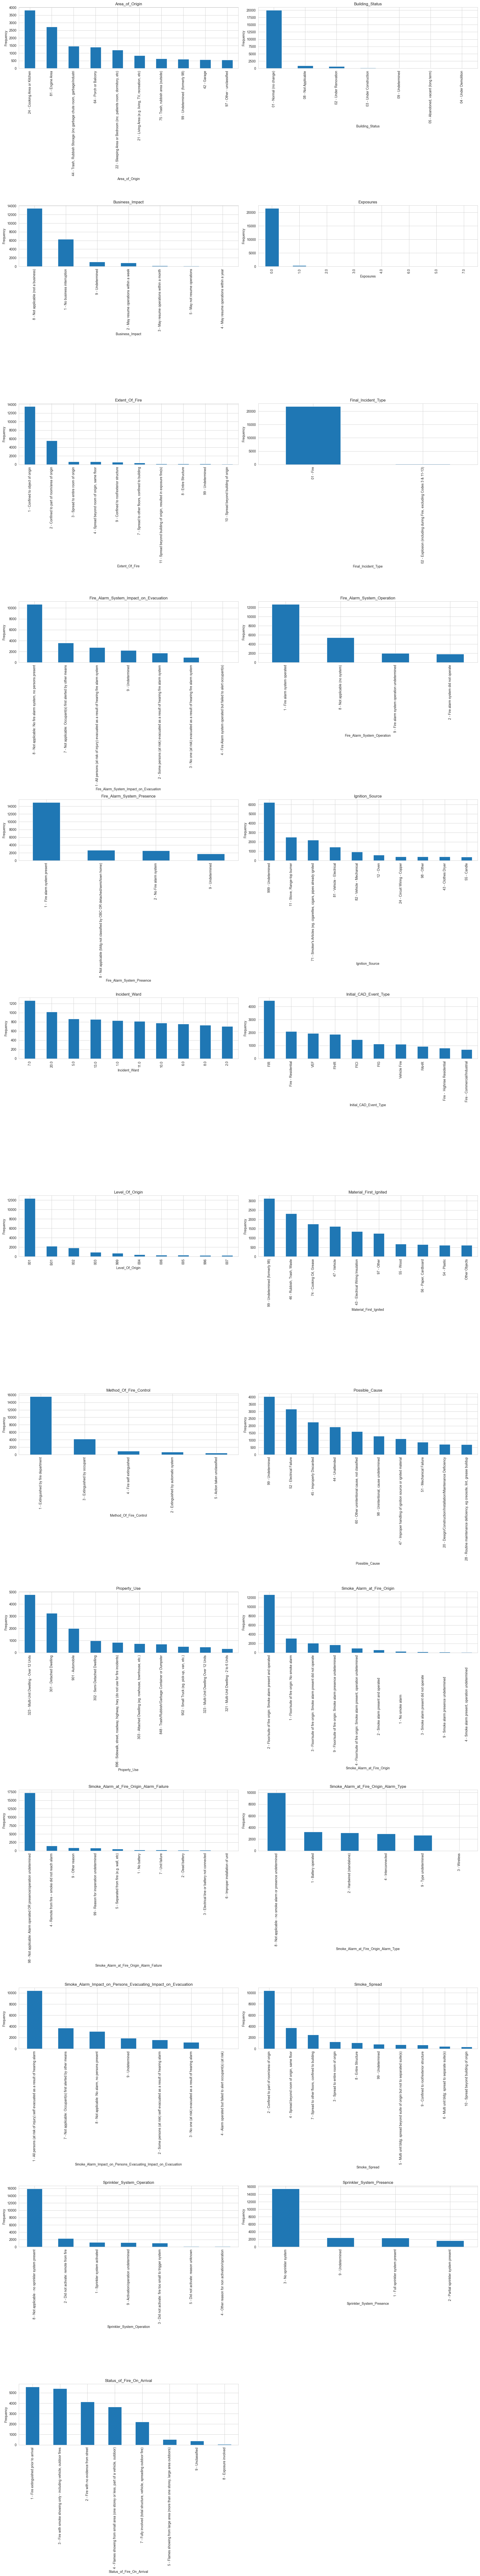

In [170]:

plt.figure(figsize=(20, 200))

for index, col in enumerate(categorical_cols, start=1):
    # Selecting the top 10 categories by frequency
    top_categories = df_cleaned2[col].value_counts().nlargest(10)
    # Plotting bar chart for the top 10 categories
    plt.subplot(len(categorical_cols), 2, index)
    top_categories.plot(kind='bar')
    plt.title(col)
    plt.ylabel('Frequency')

plt.subplots_adjust(hspace=0.6, wspace=0.2)
plt.tight_layout()
plt.show()



# Using ANOVA to determine if certain categorical features have statistically significant effects on Estimated_Dollar_Loss
We will use the transformed Estimated_Dollar_Loss_Log to ensure:
1. Normality and
2. Homoscedasticity

In [171]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

categorical_columns = [
    'Building_Status', 'Business_Impact', 'Extent_Of_Fire', 'Final_Incident_Type',
    'Fire_Alarm_System_Impact_on_Evacuation', 'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence',
    'Ignition_Source', 'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause',
    'Property_Use', 'Smoke_Alarm_at_Fire_Origin', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
    'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation',
    'Smoke_Spread', 'Sprinkler_System_Operation', 'Sprinkler_System_Presence'
]

anova_results_dict = {}  # To store ANOVA results for each categorical column

for col in categorical_columns:
    formula = f'Estimated_Dollar_Loss_Log ~ C({col})'
    model = ols(formula, data=df_cleaned2).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)
    anova_results_dict[col] = anova_results

    print(f"ANOVA results for {col}:")
    print(anova_results)
    print("\n")


ANOVA results for Building_Status:
                           sum_sq       df          F        PR(>F)
C(Building_Status)    1870.376823      6.0  24.977944  1.049963e-29
Residual            274451.844100  21991.0        NaN           NaN


ANOVA results for Business_Impact:
                           sum_sq       df           F         PR(>F)
C(Business_Impact)   17577.923157      6.0  248.994929  3.334117e-309
Residual            258744.297766  21991.0         NaN            NaN


ANOVA results for Extent_Of_Fire:
                          sum_sq       df           F  PR(>F)
C(Extent_Of_Fire)   53144.722516     11.0  475.952133     0.0
Residual           223177.498407  21986.0         NaN     NaN


ANOVA results for Final_Incident_Type:
                               sum_sq       df         F   PR(>F)
C(Final_Incident_Type)      35.110274      1.0  2.795228  0.09456
Residual                276287.110649  21996.0       NaN      NaN


ANOVA results for Fire_Alarm_System_Impact_on_Evacu

# INTERPRETING THE ANOVA RESULTS:
After log-transforming Estimated_Dollar_Loss, the ANOVA results show a significant change in the F-statistics and p-values for most of the categorical variables, indicating that the log transformation has likely helped in meeting the assumptions of normality and homoscedasticity.

**Building_Status, Business_Impact, and Extent_Of_Fire:** </br>
Highly significant effects (p < 0.01). </br>
The log transformation emphasizes the strong influence these variables have on the estimated dollar loss. The very low p-values and high F-statistics suggest that these factors play a crucial role in determining the financial impact of fire incidents. </br>

**Final_Incident_Type:** </br>
Not significant (p > 0.05). </br>
Despite the transformation, Final Incident Type does not show a statistically significant effect on the log-transformed estimated dollar loss, suggesting that this variable may not differentiate well between different levels of financial impact. </br>

**Fire_Alarm_System_Impact_on_Evacuation, Fire_Alarm_System_Operation, and Fire_Alarm_System_Presence:** </br>
Highly significant effects (p < 0.01). </br> 
The log transformation further highlights the importance of fire alarm systems' characteristics in influencing the financial outcomes of fire incidents. </br>

**Ignition_Source and Material_First_Ignited:** </br>
Highly significant effects (p < 0.01). </br> 
The transformation underscores the substantial impact that the source of ignition and the first material ignited have on the magnitude of dollar loss. </br>

**Method_Of_Fire_Control, Possible_Cause, and Property_Use:** </br>
Highly significant effects (p < 0.01). </br>
These results suggest that the method of fire control, the possible cause of the fire, and the property's use significantly affect the financial impact, with the transformation providing a clearer picture of these effects. </br>

**Smoke_Alarm_at_Fire_Origin and Related Variables:** </br>
Significant effects (p < 0.01). </br>
The presence, type, and failure of smoke alarms, as well as their impact on evacuation, continue to show a significant effect on the estimated dollar loss, with the log transformation possibly enhancing the interpretability of these effects. </br>

**Smoke_Spread, Sprinkler_System_Operation, and Sprinkler_System_Presence:** </br>
Highly significant effects (p < 0.01). </br>
These variables exhibit strong associations with the log-transformed estimated dollar loss, indicating their critical roles in influencing the financial impact of fire incidents. </br>

**Interpretation Changes with Log Transformation:** </br>
The use of log transformation means that the differences in estimated dollar loss across categories of these variables are multiplicative rather than additive. For example, significant variables are associated with a percentage change in the estimated dollar loss rather than a simple difference in dollar amounts.


### FINDING CORRELATIONS BETWEEN NUMERICAL DATA:


In [173]:
import pandas as pd

# Identify numerical columns, excluding 'Estimated_Dollar_Loss_Log'
numerical_columns = df_cleaned2.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Estimated_Dollar_Loss')

# Compute correlation matrix for numerical columns with 'Estimated_Dollar_Loss_Log'
correlation_matrix = df_cleaned2[numerical_columns + ['Estimated_Dollar_Loss_Log']].corr()
correlations_with_estimated_dollar_loss = correlation_matrix['Estimated_Dollar_Loss_Log'].drop('Estimated_Dollar_Loss_Log')

print(correlations_with_estimated_dollar_loss)


                                       Estimated_Dollar_Loss_Log  \
_id                                                     0.062994   
Civilian_Casualties                                     0.100618   
Count_of_Persons_Rescued                                0.034658   
Estimated_Number_Of_Persons_Displaced                   0.107002   
Number_of_responding_apparatus                          0.340418   
Number_of_responding_personnel                          0.338265   
TFS_Firefighter_Casualties                              0.117588   
Control_Time                                            0.176407   
Response_Time                                           0.023824   
Estimated_Dollar_Loss_Shifted                           0.145978   

                                       Estimated_Dollar_Loss_Log  
_id                                                     0.062994  
Civilian_Casualties                                     0.100618  
Count_of_Persons_Rescued                          

**Correlation Coefficient (r):** </br>

**Number_of_responding_apparatus (0.340418) and Number_of_responding_personnel (0.338265):**</br> These variables show moderate positive correlations with Log_Estimated_Dollar_Loss.</br> This suggests that as the number of apparatus and personnel responding increases, so does the log-transformed estimated dollar loss, indicating more significant incidents tend to have higher losses.

**Estimated_Number_Of_Persons_Displaced (0.107002) and Civilian_Casualties (0.100618):**</br> These show smaller positive correlations, suggesting a slight relationship where incidents with more displaced persons or civilian casualties may be associated with higher dollar losses.</br>

**Count_of_Persons_Rescued (0.034658) and TFS_Firefighter_Casualties (0.117588)** show lower positive correlations, indicating weaker linear relationships with Log_Estimated_Dollar_Loss.
